<a href="https://colab.research.google.com/github/konrad-l/titanic_classification/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import bibliotek**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
df_train = pd.read_csv('train_titanic.csv')
df_test = pd.read_csv('test_titanic.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
df_train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [ ]:
df_train[['SibSp','Parch']].isnull().sum()

SibSp    0
Parch    0
dtype: int64

**Dodanie nowej koulmny: 'Relatives', jako sumy ('SibSp' + 'Parch')**

**Dodanie nowej kolumny: 'IsFamily', która wraca 0 lub 1 jeśli są członkowie rodziny**

In [ ]:
data = [df_train, df_test]
for df in data:
    df['Relatives'] = df['SibSp'] + df['Parch']
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [ ]:
for df in data:
    df['IsFamily'] = df['Relatives'].map(lambda x: 1 if x > 0 else 0)
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,IsFamily
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,1


In [ ]:
df_train['IsFamily'].value_counts()

0    537
1    354
Name: IsFamily, dtype: int64

**Mapowanie kolumny 'Sex': male - 1, female - 0**

In [ ]:
for df in data:
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,IsFamily
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,0


In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,IsFamily
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,1,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,0,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,2,1


**Usunięcie kolumn 'PassengerId', 'Cabin', 'Relatives', 'Ticket'**

In [ ]:
df_train = df_train.drop(['PassengerId', 'Cabin', 'Ticket'], axis=1)
df_test = df_test.drop(['PassengerId', 'Cabin', 'Ticket'], axis=1)

In [ ]:
df_train = df_train.drop(['Relatives'], axis=1)
df_test = df_test.drop(['Relatives'], axis=1)

In [ ]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,IsFamily
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,0


**Usunięcie kolumny 'Age' (duża ilość braków) - dokonać próby stworzenia przedziałów**

In [ ]:
df_train = df_train.drop(['Age'], axis=1)
df_test = df_test.drop(['Age'], axis=1)

In [ ]:
df_test.head()

,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,IsFamily
0,3,"Kelly, Mr. James",0,0,0,7.8292,Q,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",1,1,0,7.0000,S,1
2,2,"Myles, Mr. Thomas Francis",0,0,0,9.6875,Q,0
3,3,"Wirz, Mr. Albert",0,0,0,8.6625,S,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,12.2875,S,1


**Uzupełnienie braków z kolumnie 'Embarked' i 'Fare' (tylko df_test)**

In [ ]:
df_train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
df_train[pd.isnull(df_train['Embarked'])]

,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,IsFamily
61,1,1,"Icard, Miss. Amelie",1,0,0,80.0,NaN,0
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,0,0,80.0,NaN,0


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df_train['Embarked'] = imputer.fit_transform(df_train[['Embarked']])
df_test['Embarked'] = imputer.fit_transform(df_test[['Embarked']])
df_test['Fare'] = imputer.fit_transform(df_test[['Fare']])

In [ ]:
df_train['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

In [ ]:
df_test.isnull().sum()

Pclass      0
Name        0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
IsFamily    0
dtype: int64

In [ ]:
df_train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
IsFamily    0
dtype: int64

**Mapowanie kolumny 'Embarked': 'S'-0, 'C'-1, 'Q'-2**

In [ ]:
df_train['Embarked'] = df_train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df_test['Embarked'] = df_test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

**Konwersja zmiennych w kolumnie 'Fare'**

In [ ]:
df_train['Fare'] = df_train['Fare'].astype(int)
df_test['Fare'] = df_test['Fare'].astype(int)

In [ ]:
df_test.head()

,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,IsFamily
0,3,"Kelly, Mr. James",0,0,0,7,2,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",1,1,0,7,0,1
2,2,"Myles, Mr. Thomas Francis",0,0,0,9,2,0
3,3,"Wirz, Mr. Albert",0,0,0,8,0,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,12,0,1


In [ ]:
df_train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,IsFamily
0,0,3,"Braund, Mr. Owen Harris",0,1,0,7,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,71,1,1
2,1,3,"Heikkinen, Miss. Laina",1,0,0,7,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,53,0,1
4,0,3,"Allen, Mr. William Henry",0,0,0,8,0,0


**Mapowanie kolumny 'Name'**

In [ ]:
df_train['Name'].value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

In [ ]:
df_train['Title'] = df_train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df_train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [ ]:
df_train['Title'] = df_train['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Countess', 'Capt', 'Sir', 'Lady', 'Don', 'Jonkheer'], 'Rare')
df_train['Title'] = df_train['Title'].replace(['Mlle', 'Ms'], 'Miss')
df_train['Title'] = df_train['Title'].replace('Mme', 'Mrs')

titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df_train['Title'] = df_train['Title'].map(titles)
df_train['Title'].value_counts()

1    517
2    185
3    126
4     40
5     23
Name: Title, dtype: int64

In [ ]:
df_train = df_train.drop(['Name'], axis=1)

In [ ]:
df_test['Name'].value_counts()

Kelly, Mr. James               1
Carr, Miss. Jeannie            1
Dennis, Mr. William            1
Rosblom, Miss. Salli Helena    1
Touma, Miss. Maria Youssef     1
                              ..
Zakarian, Mr. Mapriededer      1
Carlsson, Mr. Carl Robert      1
Dintcheff, Mr. Valtcho         1
Thomas, Mr. Charles P          1
Peter, Master. Michael J       1
Name: Name, Length: 418, dtype: int64

In [ ]:
df_test['Title'] = df_test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df_test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [ ]:
df_test['Title'] = df_test['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Countess', 'Capt', 'Sir', 'Lady', 'Don', 'Jonkheer', 'Dona'], 'Rare')
df_test['Title'] = df_test['Title'].replace(['Mlle', 'Ms'], 'Miss')
df_test['Title'] = df_test['Title'].replace('Mme', 'Mrs')

df_test['Title'] = df_test['Title'].map(titles)
df_test['Title'].value_counts()

1    240
2     79
3     72
4     21
5      6
Name: Title, dtype: int64

In [ ]:
df_test = df_test.drop(['Name'], axis=1)

In [ ]:
df_train.head()
#df_test.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,IsFamily,Title
0,0,3,0,1,0,7,0,1,1
1,1,1,1,1,0,71,1,1,3
2,1,3,1,0,0,7,0,0,2
3,1,1,1,1,0,53,0,1,3
4,0,3,0,0,0,8,0,0,1


**Modele klasyfikacji**

In [ ]:
#X_train = df_train.copy()
#y_train = df_train.pop('Survived')
#X_test = df_test.copy()

In [ ]:
#y_train.head()

In [ ]:
#X_train.head()

**Przygotowanie danych do modelu**

In [ ]:
# przygotowanie danych treningowych dla modeli
data_raw = df_train.values
target = data_raw[:,0]
print('target shape:', target.shape)

data = data_raw[:,1:]
print('data shape:', data.shape)

target shape: (891,)
data shape: (891, 8)


In [ ]:
data

array([[3, 0, 1, ..., 0, 1, 1],
       [1, 1, 1, ..., 1, 1, 3],
       [3, 1, 0, ..., 0, 0, 2],
       ...,
       [3, 1, 1, ..., 0, 1, 2],
       [1, 0, 0, ..., 1, 0, 1],
       [3, 0, 0, ..., 2, 0, 1]])

In [ ]:
# przygotowanie danych testowych dla modeli
data_test = df_test.values

print('data_test shape:', data_test.shape)

data_test shape: (418, 8)


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(data, target)
y_pred = rf_classifier.predict(data_test)

rf_score = rf_classifier.score(data, target)
rf_score

0.9079685746352413

In [ ]:
# sprawdzenie dokładności dopasowania dla danych treningowych 
from sklearn.metrics import accuracy_score
y = rf_classifier.predict(data)
accuracy_score(target, y)

0.9079685746352413

**Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

# log_reg = LogisticRegression(solver='lbfgs', max_iter=130)
log_reg = LogisticRegression()
log_reg.fit(data, target)
y_pred = log_reg.predict(data_test)

logistic_score = log_reg.score(data, target)
logistic_score

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7946127946127947

In [ ]:
y_pred = log_reg.predict(data)
y = log_reg.predict(data)

accuracy_score(target, y)

0.7946127946127947

**Zrobić pipeline oraz w tym standard scaler:**

**przykład 1:**
https://scikit-learn.org/stable/modules/preprocessing.html

**przykład 2:**
https://scikit-learn.org/stable/modules/svm.html

**SVM - linear**

In [ ]:
from sklearn.svm import SVC

# SVC linear
svm_linear = SVC(C=1.0, kernel='linear')

svm_linear.fit(data, target)
y_pred = svm_linear.predict(data_test)

svm_score = svm_linear.score(data, target)
svm_score

0.813692480359147

**SVM - rbf**

In [ ]:
# SVC rbf
from sklearn.svm import SVC
svm_rbf = SVC(C=1.0, kernel='rbf')

svm_rbf.fit(data, target)
y_pred = svm_rbf.predict(data_test)

svm_rbf_score = svm_rbf.score(data, target)
svm_rbf_score

0.6801346801346801

**KNeighbors**

In [ ]:
# k_neighbors
from sklearn.neighbors import KNeighborsClassifier

#knn = KNeighborsClassifier(n_neighbors=5)
knn = KNeighborsClassifier()
knn.fit(data, target)

y_pred = knn.predict(data_test)

knn_score = knn.score(data, target)
knn_score

0.8540965207631874

**SGD - Stochastic Gradient Descent**

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(data, target)

sgd.score(data, target)

0.6722783389450057

**Klasyfikator bayesowski**

In [ ]:
from sklearn.naive_bayes import GaussianNB

bayes = GaussianNB()
bayes.fit(data, target)

bayes_score = bayes.score(data, target)
bayes_score

0.7968574635241302

In [ ]:
results = pd.DataFrame({'Classifier': ['Random Forest', 'Logistic regression', 
                                       'SVM - linear', 'SVM - rbf', 'KNeighbors', 'Gaussian'],
                        'Score': [rf_score, logistic_score, svm_score, svm_rbf_score, knn_score, bayes_score]})

results = results.sort_values(by='Score', ascending=False)

In [ ]:
results.reset_index(drop=True)

,Classifier,Score
0,Random Forest,0.907969
1,KNeighbors,0.854097
2,SVM - linear,0.813692
3,Gaussian,0.796857
4,Logistic regression,0.794613
5,SVM - rbf,0.680135


**Cross validation (dla modelu Random Forest)**

In [ ]:
from sklearn.model_selection import cross_val_score

# max_depth - głębokość drzewa 
# min_samples_split - minimalna ilość próbek na liściu

scores = cross_val_score(estimator=rf_classifier, X=data, y=target, cv=8)

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.78571429 0.79464286 0.78571429 0.86486486 0.84684685 0.79279279
 0.79279279 0.85585586]
Mean: 0.8149030727155727
Standard Deviation: 0.03218285974755677


**Ważność cech**

In [ ]:
importances = pd.DataFrame({'columns': df_train.iloc[:,1:].columns,
                            'importance' : rf_classifier.feature_importances_})

importances = importances.sort_values(by='importance', ascending=False)
importances.reset_index(drop=True)

,columns,importance
0,Fare,0.290455
1,Sex,0.217974
2,Title,0.217020
3,Pclass,0.107317
4,SibSp,0.062327
5,Parch,0.047200
6,Embarked,0.043467
7,IsFamily,0.014240


**Grid Search (dobór hiperparametrów)**

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'criterion' : ['gini', 'entropy'],
          'min_samples_leaf': [1, 5, 10, 25, 50, 70],
          'min_samples_split': [2, 4, 10, 12, 16, 18, 25, 35],
          'n_estimators': [50, 100, 400, 700, 1000, 1500]}

# grid_search = GridSearchCV(rf_classifier, param_grid=params, scoring='accuracy', cv=5)

rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
grid_search = GridSearchCV(estimator=rf, param_grid=params, n_jobs=-1)
grid_search.fit(data, target)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(estimator=RandomForestClassifier(max_features='auto', n_jobs=-1,
                                              oob_score=True, random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 70],
                         'min_samples_split': [2, 4, 10, 12, 16, 18, 25, 35],
                         'n_estimators': [50, 100, 400, 700, 1000, 1500]})

In [ ]:
grid_search.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 25,
 'n_estimators': 400}

In [ ]:
# sprawdzenie modelu przy nowych hiperparametrach
rf_classifier = RandomForestClassifier(criterion='gini', min_samples_leaf=1, 
                                       min_samples_split=25, n_estimators=400, 
                                       random_state=42, n_jobs=-1,)
rf_classifier.fit(data, target)
y_pred = rf_classifier.predict(data_test)

rf_score = rf_classifier.score(data, target)
rf_score

0.8529741863075196

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = rf_classifier.predict(data)
cm = confusion_matrix(target, y_pred)
cm

array([[514,  35],
       [ 96, 246]])

**Macierz konfuzji**

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

predictions = cross_val_predict(rf_classifier, data, target, cv=3)
cm = confusion_matrix(target, predictions)
cm

array([[491,  58],
       [104, 238]])

In [ ]:
import plotly.figure_factory as ff

def plot_confusion_matrix(cm):
  cm = cm[::-1]
  cm = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_1', 'true_0'])

  fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index),
                                    colorscale='ice', showscale=True, reversescale=True)
  fig.update_layout(width=400, height=400, title='Confusion Matrix', font_size=16)
  fig.show()

plot_confusion_matrix(cm)

In [ ]:
# raport klasyfikacji
from sklearn.metrics import classification_report

print(classification_report(target, predictions))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       549
           1       0.80      0.70      0.75       342

    accuracy                           0.82       891
   macro avg       0.81      0.80      0.80       891
weighted avg       0.82      0.82      0.82       891



In [ ]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(target, predictions))
print("Recall:", recall_score(target, predictions))

Precision: 0.8040540540540541
Recall: 0.695906432748538


In [ ]:
from sklearn.metrics import f1_score
f1_score(target, predictions)

0.7460815047021944

**Krzywa Precision Recall**

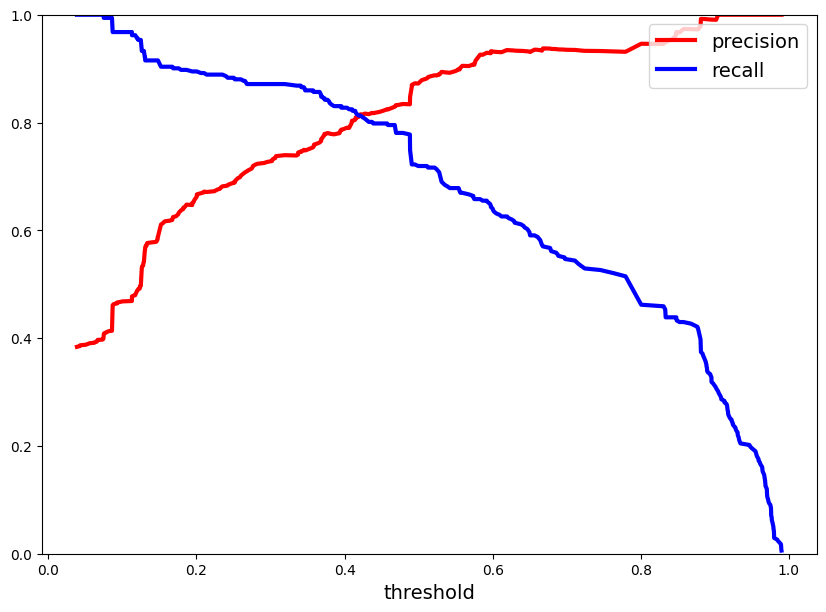

In [ ]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = rf_classifier.predict_proba(data)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(target, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=3)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=3)
    plt.xlabel("threshold", fontsize=14)
    plt.legend(loc="upper right", fontsize=14)
    plt.ylim([0, 1])

plt.figure(figsize=(10, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

**Precision i recall**

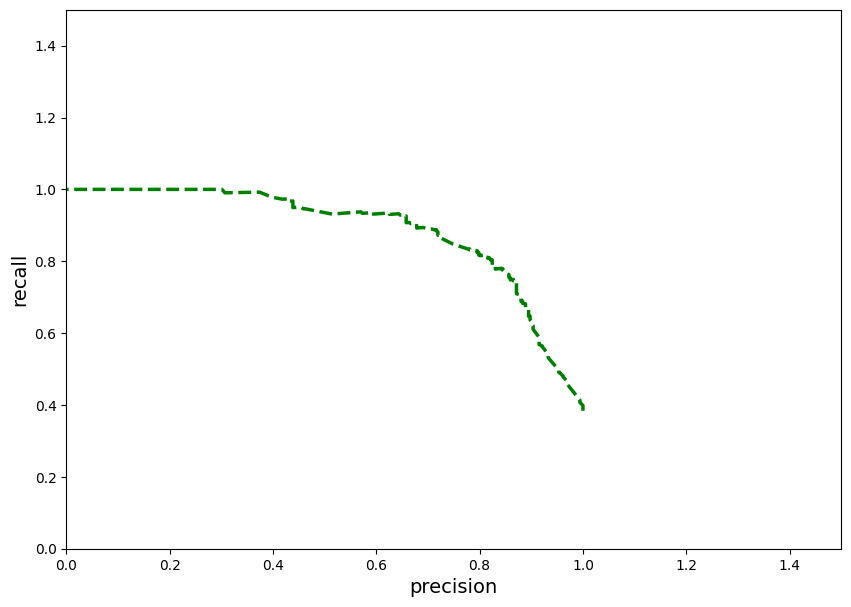

In [ ]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=14)
    plt.xlabel("precision", fontsize=14)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(10, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

**Krzywa ROC**

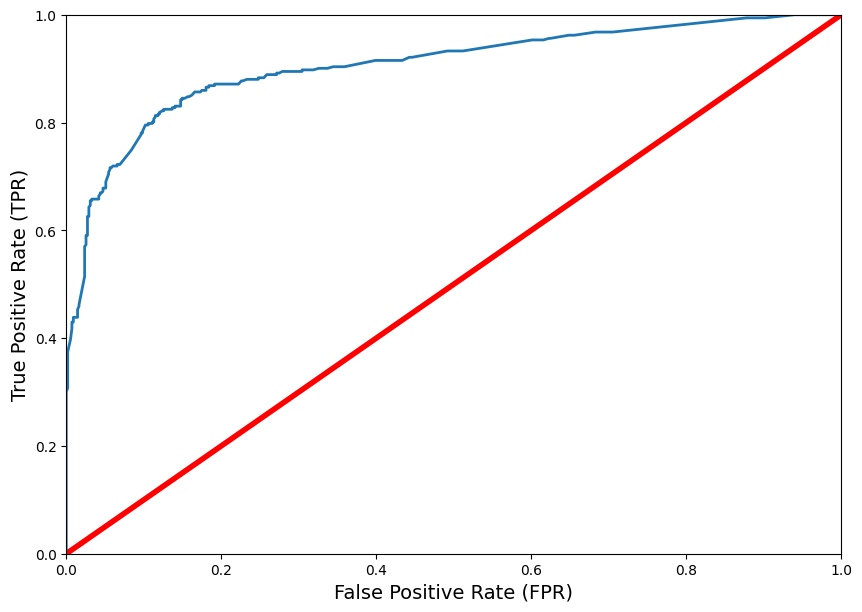

In [ ]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(target, y_scores)# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=14)
    plt.ylabel('True Positive Rate (TPR)', fontsize=14)

plt.figure(figsize=(10, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

**ROC AUC Score**

In [ ]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(target, y_scores)
print("ROC AUC Score:", r_a_score)

ROC AUC Score: 0.9055725987707581
